# <div dir=rtl> רגרסיה לינארית ו Fitting</div>


<div dir=rtl>
    בתרגול זה נבחן את הפונקציות השונות המשמשות לרגרסיה לינארית. נכיר חבילה חדשה, מעט יותר מותאמת לסטטיסטיקה, ונראה איך העקרונות שאנחנו מכירים מסטטיסטיקה מיושמים איתה.

</div>



## <div dir=rtl> שאלה 1</div>

<div dir=rtl> 
    בדצמבר 2019 התגלו במחוז חוביי שבסין מספר מקרים של דלקת ריאות אשר נגרמה מוירוס חדש ומסתורי. זמן קצר לאחר מכן מקרים דומים התגלו ברחבי סין ולאחר מכן מסביב לעולם. המידע על אודות מספר המטופלים קיים בקובץ 5.covid19_time_series.csv
    <br /><br />
    א. טענו את הקובץ לאובייקט מסוג DataFrame
</div>


In [1]:
%ls

5.covid19_time_series.csv* 5_recitation_5.ipynb*
5_recitation_5.html*       6_heart_disease_3.csv*


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'axes.grid':True,
         'axes.grid.which':'both'
         }
plt.rcParams.update(params)

In [4]:
dataset = pd.read_csv('5.covid19_time_series.csv')
dataset.sample(4)

,Country/Region,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
48,China,Hainan,0,0,0,0,0,0,0,0,...,161,168,168,168,168,168,168,168,168,168
131,Italy,State Wide,0,0,0,0,0,0,0,0,...,7024,8326,9362,10361,10950,12384,13030,14620,15729,16847
154,Mexico,State Wide,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,35,35,35
187,Saint Lucia,State Wide,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1


In [5]:
dataset.set_index(['Country/Region', 'Province/State'], inplace=True)
dataset.columns = pd.to_datetime(dataset.columns)
dataset.sample(4)

,,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,
Paraguay,State Wide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
Bosnia and Herzegovina,State Wide,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,5,5,8,17,17,19
Singapore,State Wide,0,0,0,0,0,0,0,0,0,0,...,144,156,160,172,183,198,212,228,240,245
China,Hubei,28,28,31,32,42,45,80,88,90,141,...,59879,60324,60811,61201,61732,62098,62570,62889,63153,63326


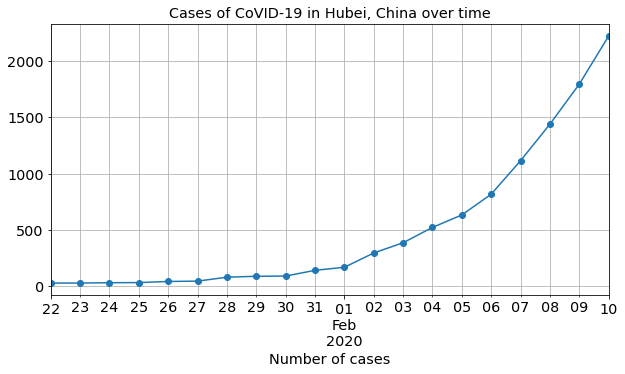

In [6]:
hubei_region = pd.DataFrame(
    dataset.loc[('China','Hubei'),:'Feb 10 2020']
)

def cases_plot(df, cols):
    plot = df[cols].plot(
        grid=True,
        marker='o',
    )

    xl = plt.xlabel('Date')
    yl = plt.xlabel('Number of cases')
    title = plt.title('Cases of CoVID-19 in Hubei, China over time')
    
    return plot

plot = cases_plot(hubei_region,('China','Hubei'))

<div dir=rtl> 
    ב. מיצאו מודל על ידי רגרסיה לינארית המתאר את הנתונים ונותן תחזית ליום ה11 בפברואר.
</div>

In [7]:
import statsmodels.api as sm

<div dir=rtl> 
    ברגרסיה לינארית אנחנו מתאימים מודל מהצורה:
</div>

\begin{align}
Y=Xβ+\epsilon \\ 
\epsilon∼N(0,Σ)
\end{align}

<div dir=rtl> 
    כאשר אפסילון הינו איבר רעש המתפלג נורמלית עם ממוצע אפס ומטריצת קו-ווראינס מסוימת.
    <br />
    נגדיר כעת את המשתנים עליהם נבצע ריגרסיה לינארית. נקח את הציר האופקי בתור היום בחודש ואת הציר האנכי כמספר החולים.
</div>

In [8]:
y = hubei_region[('China','Hubei')].values
x = np.arange(y.shape[0])

print(x)
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[  28   28   31   32   42   45   80   88   90  141  168  295  386  522
  633  817 1115 1439 1795 2222]


<div dir=rtl> 
    ניצור כעת מודל, נאמן אותו ונמצא את הפרמטרים מתוכו.
</div>

In [9]:
model = sm.OLS(y,sm.add_constant(x))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     49.59
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           1.43e-06
Time:                        15:05:17   Log-Likelihood:                -144.30
No. Observations:                  20   AIC:                             292.6
Df Residuals:                      18   BIC:                             294.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -399.9143    149.468     -2.676      0.015    -713.935     -85.893
x1            94.7120     13.450      7.042      0.000      66.455     122.969
==============================================================================
Omnibus:                        2.907   Durbin-Watson:                   0.162
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.105
Skew:                           0.787   Prob(JB):                        0.349
Kurtosis:                       2.780   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div dir=rtl> 
    נשים לב שהיינו צריכים להוסיף קבוע בעת האימון. זאת משום שאנחנו מנסים להתאים מודל לינארי (חותך ושיפוע) למודל למעלה עם ביתא ומיו - כלומר היינו צריכים להוסיף איבר קבוע על מנת להכליל את החותך לתוך המטריצה X. את הערך המתאים בביתא לקבוע הזה אנחנו רואים בטבלה מעל - const - וזה למעשה החותך.
    עוד אנחנו רואים את המקדם של x1 - וזה שיפוע הישר.
    <br />
    לכל אחד מהם אנחנו רואים את השגיאה, סטטיסטי, PV ורווח סמך.
    <br />
    לבסוף נשים לב למקדם המתאם של פירסון - הוא חיובי וגדול. זה דווקא צפוי כי שני הווקטורים עולים ביחד מונוטונית.</div>

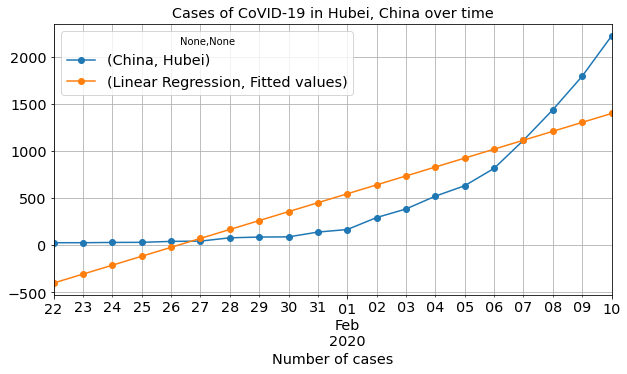

In [10]:
hubei_region[('Linear Regression','Fitted values')] = results.fittedvalues
plot = cases_plot(hubei_region,[('China','Hubei'),('Linear Regression','Fitted values')])

<div dir=rtl>
    נחשב את התחזית של ה-11 בפברואר. ה-10 בפברואר הייתה התצפית האחרונה שלנו בווקטור x, לכן נרצה לחשב מה קורה בנקודת הזמן הבאה, נקודה מס׳ 20:
</div>

In [11]:
print("Feb 11 2020 cases:", dataset.loc[('China','Hubei'),'Feb 11 2020'])
print("Predicted Feb 11 2020 cases:", np.round(results.predict([1,20])[0],2))

Feb 11 2020 cases: 2639
Predicted Feb 11 2020 cases: 1494.33


<div dir=rtl> 
    נבחן את השארים - ההפרשים בין הנתונים למודל. עבור מודל ללא טרנספורמציה כלשהי השארים מפורשים במודל עצמו.
</div>

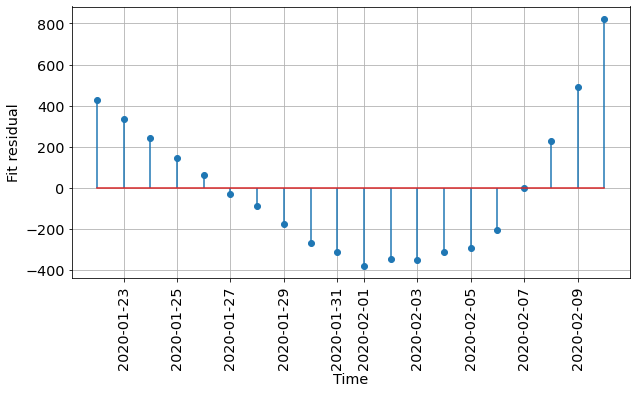

In [12]:
hubei_region[('Linear Regression','Residuals')] = results.resid

def residual_stem_plot(resid_series):
    stemp = plt.stem(
        resid_series.index,
        resid_series,
        use_line_collection=True
    )

    yl = plt.ylabel('Fit residual')
    xl = plt.xlabel('Time')
    xt = plt.xticks(rotation=90)
    return stemp

stemp = residual_stem_plot(hubei_region[('Linear Regression','Residuals')])

(array([8., 4., 2., 3., 2., 1.]),
 array([-379.20601504, -178.94072682,   21.3245614 ,  221.58984962,
         421.85513784,  622.12042607,  822.38571429]),
 <BarContainer object of 6 artists>)

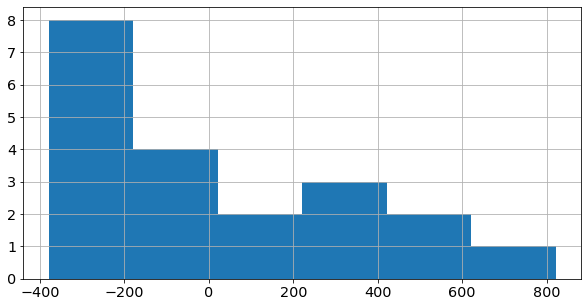

In [13]:
plt.hist(hubei_region[('Linear Regression','Residuals')], bins='auto')

<div dir=rtl> 
    אנחנו רואים את ההפרשים בערכים אבסולוטיים והם אכן גדולים יחסית, אבל יותר מכך רואים מגמתיות בשארים - דבר המעיד על כך שהמודל לא נכון. במודל "טוב" היינו מצפים לשארים רנדומליים.
    <br />
    נחפש מודל יותר מתאים. נמצא טרנספורמציה למודל הלינארי שלנו כך שהפלט יהיה לא לינארי.
</div>

\begin{align}
Y=e^{Xβ+\epsilon} \\ 
\epsilon∼N(0,Σ)\\
\\
log(Y)=Xβ+\epsilon\\
\end{align}

<div dir=rtl> 
    נשים לב שמה שעשינו זה למעשה הרכבת פונקציות.
    <br />
    נחזור על התהליך עם המודל החדש.
</div>


In [14]:
y = np.log(hubei_region[('China','Hubei')].values)
x = np.arange(y.shape[0])

model = sm.OLS(y,sm.add_constant(x))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1036.
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           2.30e-17
Time:                        15:05:28   Log-Likelihood:                 4.4944
No. Observations:                  20   AIC:                            -4.989
Df Residuals:                      18   BIC:                            -2.997
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8380      0.088     32.326      0.000       2.654       3.023
x1             0.2543      0.008     32.193      0.000       0.238       0.271
==============================================================================
Omnibus:                        1.513   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                0.361
Skew:                           0.215   Prob(JB):                        0.835
Kurtosis:                       3.498   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

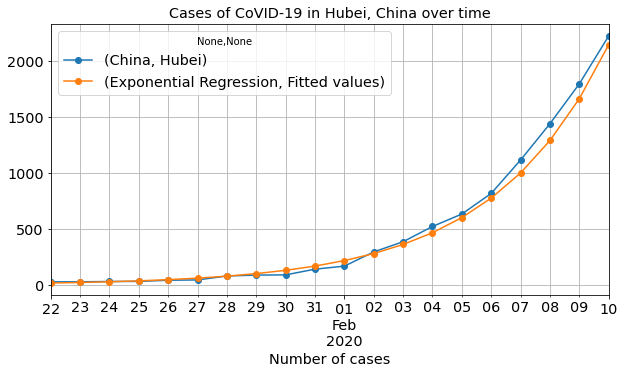

In [15]:
hubei_region[('Exponential Regression','Fitted values')] = np.exp(results.fittedvalues)

plot = cases_plot(hubei_region, [('China','Hubei'),('Exponential Regression','Fitted values')])

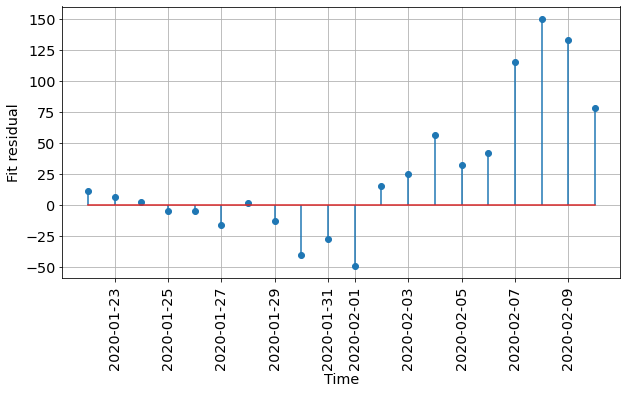

In [16]:
hubei_region[('Exponential Regression','Residuals')] = np.exp(y) - np.exp(results.fittedvalues)

stemp = residual_stem_plot(hubei_region[('Exponential Regression','Residuals')])

(array([3., 9., 3., 2., 1., 2.]),
 array([-49.32103814, -16.11849834,  17.08404146,  50.28658127,
         83.48912107, 116.69166087, 149.89420067]),
 <BarContainer object of 6 artists>)

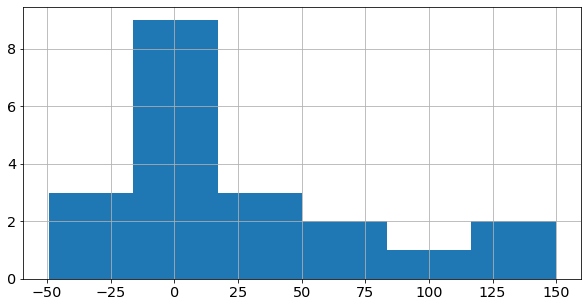

In [17]:
plt.hist(hubei_region[('Exponential Regression','Residuals')], bins='auto')

<div dir=rtl> 
    השתפרנו. אנחנו רואים גם שמדדי טיב ההתאמה בתוצאות השתפרו וגם שארים יותר קטנים ויותר אקראיים. עם זאת אנחנו רואים מגמה בה השארים גדלים ככל שמתרחקים מתחילת המדידות, דבר שגורם לנו לחשוב שאולי המודל הזה גם לא מתאים.
    <br />
    ננסה לראות מה המודל מנבא עד היום.

</div>

In [18]:
dataset.loc[('China','Hubei'),:].shape[0]

71

<div dir=rtl> 
    ג. תנו הערכה למספר החולים מה11 לפברואר ועד ה1 לאפריל. לרשותכם נתונים הנתונים האמיתיים.
</div>
<div dir=rtl> 
    <br /><br />
    יש נתונים על 71 ימים. נתאים להם פרדיקציה מהמודל.
    <br />
    על מנת לעשות זאת נשתמש במתודה predict של אובייקט התוצאות.
</div>

In [19]:
hubei_region_long = pd.DataFrame(
    dataset.loc[('China','Hubei'),:].values, 
    columns=['Observed'],
    index=dataset.loc[('China','Hubei'),:].index
)

hubei_region_long['Exponential Regression Prediction'] = np.exp(results.predict(
    sm.add_constant(
        np.arange(
            dataset.loc[('China','Hubei'),:].shape[0]
        )
    )
))

hubei_region_long.head(4)

,Observed,Exponential Regression Prediction
2020-01-22,28,17.082413
2020-01-23,28,22.029491
2020-01-24,31,28.409247
2020-01-25,32,36.636585


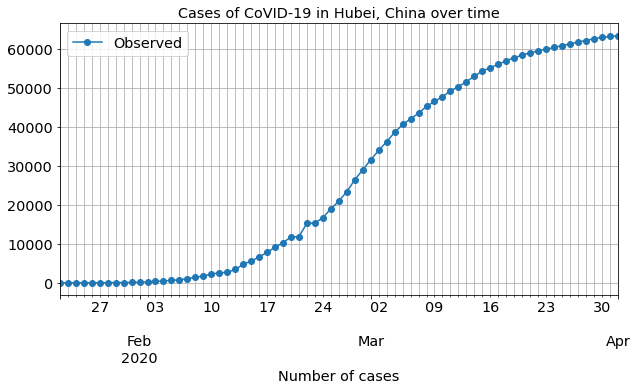

In [20]:
plot = cases_plot(hubei_region_long, ['Observed'])

<div dir=rtl> 
    מעל - הנתונים. כעת לפרדיקציה...
</div>

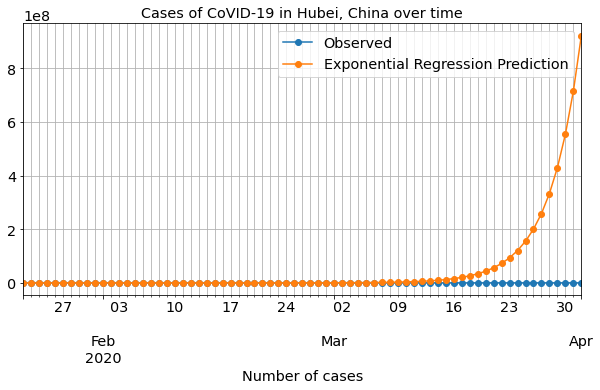

In [21]:
plot = cases_plot(hubei_region_long, ['Observed','Exponential Regression Prediction'])

<div dir=rtl> 
    כלומר אנחנו כעת אמורים להיות ב800 מליון חולים במחוז הזה בלבד. זו כמובן חריגה מהנתונים במציאות מה שמעיד שהמודל לא מתאים.
    <br />
    בתור העשרה נציין שהמודל המתאים הוא מודל סיגמואידי אשר מגיע מפתרון משוואה דיפרנציאלית המתארת את הטרנדים באוכלוסיה.
    <br />
    המשוואות לא מייצגות הרכבה של פונקציה לינארית לכן אפשר לבצע curve fitting אבל לא בדיוק רגרסיה לינארית.
    עוד על התאמת העקומה אפשר למצוא בקישור: <a>https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python</a>
</div>

\begin{align}
\frac{dP}{dt}=r P \left(1 - \frac{P}{K}\right) \\
P(t) = \frac{K}{1+\left(\frac{K-P_0}{P_0}\right)e^{-rt}}\\
\end{align}


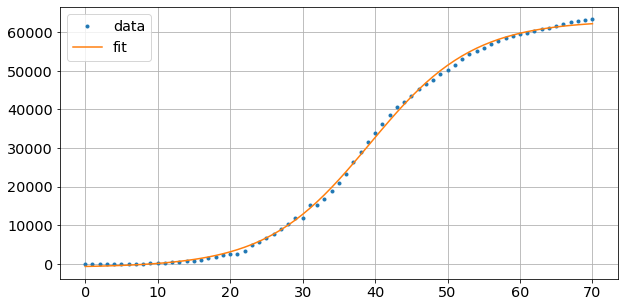

In [22]:
from scipy.optimize import curve_fit

ydata = hubei_region_long['Observed'].values
xdata = np.arange(ydata.shape[0])

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

p0 = [max(ydata), np.median(xdata),1,min(ydata)] # this is a mandatory initial guess

popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox')

y = sigmoid(xdata, *popt)

plt.plot(xdata, ydata, 'o', label='data', markersize=3)
plt.plot(xdata,y, label='fit')
plt.legend(loc='best')


## <div dir=rtl> שאלה 2</div>
<div dir=rtl> 
    בהינתן נקודות מתוך מודל פולינומיאלי רועש צור מודל המתאר את התוצאות באופן המיטבי.
</div>

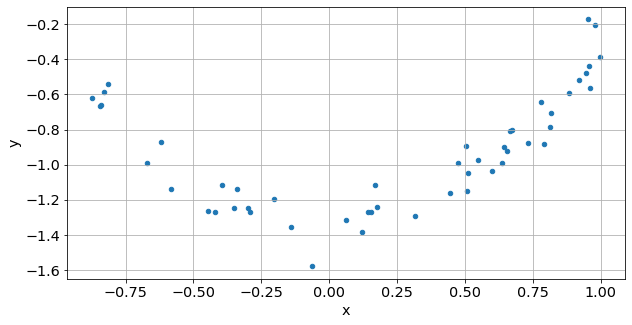

In [23]:
size = 50
x = np.random.uniform(-1,1,size=size)
y = x**2 + 0.1*np.random.normal(size=size) + np.random.normal()

data = pd.DataFrame({'x':x, 'y':y})
scatp = data.plot.scatter(
    x='x',
    y='y'
)

<div dir=rtl> 
    נעשה טריק. נעלה את הציר האופקי בריבוע. ונצייר את הנקודות כתלות בציר הזה.
</div>

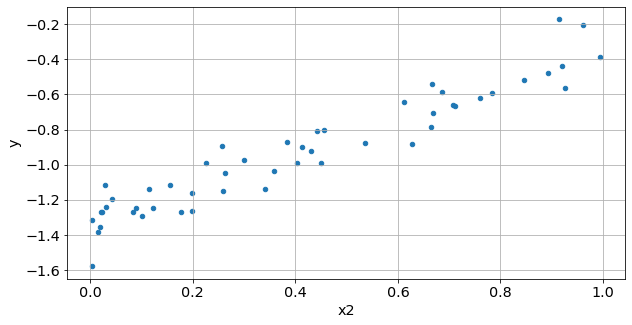

In [24]:
data = data.assign(x2 = x**2)
scatp = data.plot.scatter(
    x='x2',
    y='y'
)

<div dir=rtl> 
    וזהו קו ישר בקירוב. כלומר אנחנו מצאנו מרחב בו ניתן לעשות רגרסיה לינארית רגילה.
    נמצא מקדמים כך שיהיה ניתן לקרב את הנקודות כך:
</div>

\begin{align}
y = a_0 + a_1x + a_2x^2
\end{align}

In [25]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree = 2)
xp = polynomial_features.fit_transform(data['x'].values.reshape(-1,1))
xp[:5,:]

array([[ 1.        ,  0.59884943,  0.35862064],
       [ 1.        , -0.29008146,  0.08414725],
       [ 1.        ,  0.31609257,  0.09991451],
       [ 1.        ,  0.50805324,  0.25811809],
       [ 1.        ,  0.50592034,  0.25595539]])

In [26]:
model = sm.OLS(data['y'], xp)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     229.8
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           5.42e-25
Time:                        15:06:37   Log-Likelihood:                 44.646
No. Observations:                  50   AIC:                            -83.29
Df Residuals:                      47   BIC:                            -77.56
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3341      0.024    -55.996      0.000      -1.382      -1.286
x1             0.0129      0.026      0.497      0.621      -0.039       0.065
x2             0.9864      0.050     19.760      0.000       0.886       1.087
==============================================================================
Omnibus:                        0.577   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.749   Jarque-Bera (JB):                0.258
Skew:                           0.173   Prob(JB):                        0.879
Kurtosis:                       3.060   Cond. No.                         4.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div dir=rtl> 
    נצייר את מה שקיבלנו יחד עם הנקודות.
</div>

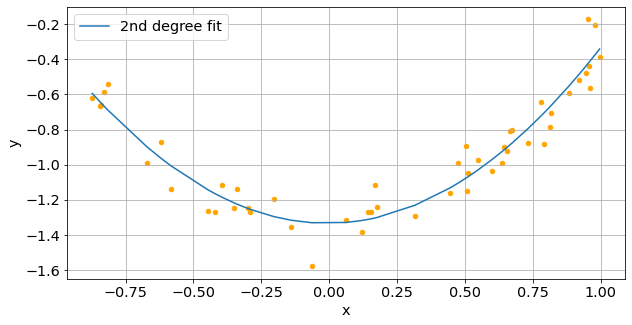

In [27]:
data['2nd degree fit'] = results.fittedvalues

fig, ax = plt.subplots()
scatp = data.plot.scatter(
    x='x',
    y='y',
    ax=ax,
    color = 'orange'
)

linep = data[['x','2nd degree fit']].sort_values('x').plot(
    x='x',
    y='2nd degree fit',
    ax=ax
)

(-0.5, 0.5)

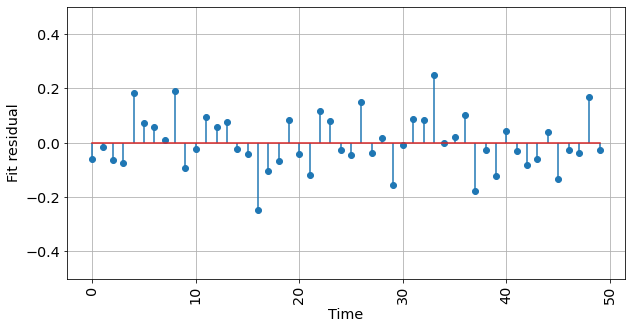

In [28]:
data['2nd degree residuals'] = results.resid
stemp = residual_stem_plot(data['2nd degree residuals'])
plt.ylim([-0.5,0.5])

<div dir=rtl> 
    אבל למה לעצור שם? למה לא לעשות מודל יותר מורכב?
</div>

In [29]:
polynomial_features = PolynomialFeatures(degree = 16)
xp = polynomial_features.fit_transform(data['x'].values.reshape(-1,1))

In [30]:
model = sm.OLS(data['y'], xp)
results = model.fit()

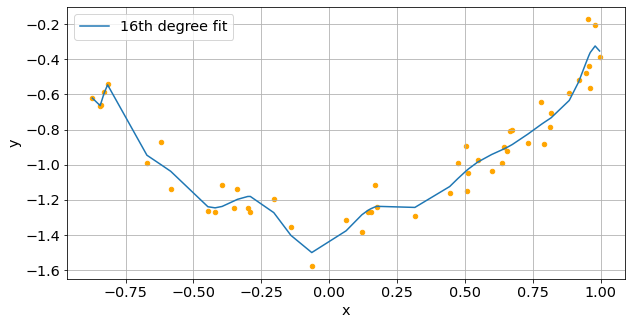

In [31]:
data['16th degree fit'] = results.fittedvalues

fig, ax = plt.subplots()
scatp = data.plot.scatter(
    x='x',
    y='y',
    ax=ax,
    color = 'orange'
)

linep = data[['x','16th degree fit']].sort_values('x').plot(
    x='x',
    y='16th degree fit',
    ax=ax
)

(-0.5, 0.5)

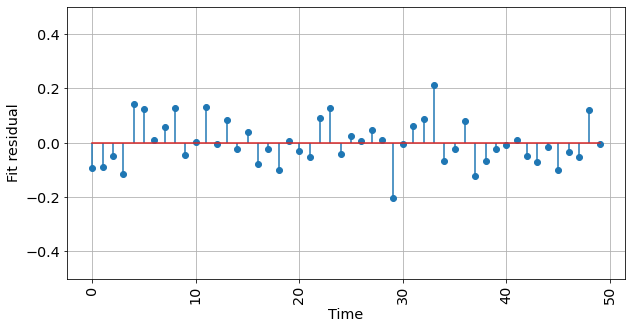

In [32]:
data['16nd degree residuals'] = results.resid
stemp = residual_stem_plot(data['16nd degree residuals'])
plt.ylim([-0.5,0.5])

In [33]:
polynomial_features = PolynomialFeatures(degree = 32)
xp = polynomial_features.fit_transform(data['x'].values.reshape(-1,1))

model = sm.OLS(data['y'], xp)
results = model.fit()


(-2.5, 2.5)

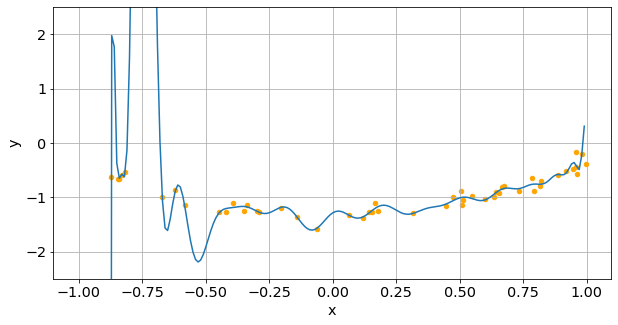

In [34]:
data['32th degree fit'] = results.fittedvalues

x_values = np.arange(-1,1,0.01)
x_values_2 = polynomial_features.transform(x_values.reshape(-1,1))
curve = results.predict(x_values_2)

fig, ax = plt.subplots()
scatp = data.plot.scatter(
    x='x',
    y='y',
    ax=ax,
    color = 'orange'
)

ax.plot(x_values, curve)
plt.ylim([-2.5,2.5])

(-0.5, 0.5)

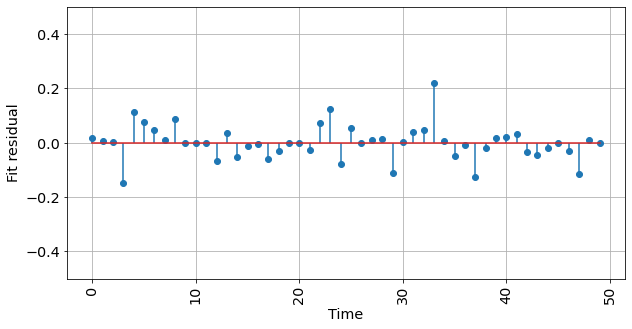

In [35]:
data['32th degree residuals'] = results.resid
stemp = residual_stem_plot(data['32th degree residuals'])
plt.ylim([-0.5,0.5])

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     13.80
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           3.35e-07
Time:                        15:07:13   Log-Likelihood:                 67.574
No. Observations:                  50   AIC:                            -69.15
Df Residuals:                      17   BIC:                            -6.051
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2868      0.215     -5.977      0.000      -1.741      -0.833
x1             2.9124      2.117      1.376      0.187      -1.554       7.378
x2           -62.6486     62.310     -1.005      0.329    -194.110      68.813
x3          -285.3628    331.631     -0.860      0.401    -985.042     414.317
x4          6302.5246   5357.174      1.176      0.256   -5000.124    1.76e+04
x5          1.079e+04   1.84e+04      0.588      0.564   -2.79e+04    4.95e+04
x6         -2.408e+05   2.11e+05     -1.142      0.269   -6.86e+05    2.04e+05
x7         -1.901e+05   4.81e+05     -0.395      0.698    -1.2e+06    8.25e+05
x8          4.916e+06   4.52e+06      1.087      0.292   -4.62e+06    1.45e+07
x9          1.391e+06   7.18e+06      0.194      0.849   -1.38e+07    1.65e+07
x10        -6.164e+07   5.91e+07     -1.042      0.312   -1.86e+08    6.31e+07
x11         3.957e+06    6.8e+07      0.058      0.954   -1.39e+08    1.47e+08
x12         5.108e+08   5.08e+08      1.006      0.328    -5.6e+08    1.58e+09
x13         -1.69e+08   4.44e+08     -0.380      0.708   -1.11e+09    7.69e+08
x14        -2.913e+09   2.99e+09     -0.976      0.343   -9.21e+09    3.39e+09
x15         1.604e+09   2.22e+09      0.722      0.480   -3.08e+09    6.29e+09
x16         1.168e+10   1.23e+10      0.947      0.357   -1.43e+10    3.77e+10
x17         -8.69e+09   9.08e+09     -0.957      0.352   -2.78e+10    1.05e+10
x18        -3.317e+10   3.61e+10     -0.920      0.370   -1.09e+11    4.29e+10
x19         3.077e+10   2.94e+10      1.048      0.309   -3.12e+10    9.27e+10
x20         6.623e+10   7.43e+10      0.891      0.385   -9.06e+10    2.23e+11
x21         -7.44e+10   7.03e+10     -1.059      0.304   -2.23e+11    7.38e+10
x22        -9.034e+10   1.06e+11     -0.856      0.404   -3.13e+11    1.32e+11
x23         1.239e+11   1.19e+11      1.041      0.313   -1.27e+11    3.75e+11
x24         7.832e+10   9.77e+10      0.802      0.434   -1.28e+11    2.84e+11
x25        -1.401e+11   1.38e+11     -1.016      0.324   -4.31e+11    1.51e+11
x26        -3.433e+10   5.09e+10     -0.675      0.509   -1.42e+11     7.3e+10
x27         1.027e+11   1.03e+11      0.993      0.335   -1.16e+11    3.21e+11
x28        -2.589e+09   9.76e+09     -0.265      0.794   -2.32e+10     1.8e+10
x29        -4.407e+10   4.53e+10     -0.972      0.345    -1.4e+11    5.15e+10
x30         9.758e+09   8.78e+09      1.112      0.282   -8.76e+09    2.83e+10
x31         8.398e+09    8.8e+09      0.955      0.353   -1.02e+10     2.7e+10
x32        -3.095e+09   3.06e+09     -1.010      0.327   -9.56e+09    3.37e+09
==============================================================================
Omnibus:                        8.254   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               11.100
Sk

<div dir=rtl> 
    כלומר השתפרנו במידה רבה. אמנם הצלחנו "לגעת" כמעט בכל נקודה אנחנו כבני אדם עם ידע קודם יודעים שנקודות מבחן חדשות, אם יצטרפו לא יהיו מותאמים למודל הזה ואולי אפילו רחוקים ממנו מאוד - וזה הרעיון של אוברפיט. נהיה גרועים במבחן.
</div>